Hey there!
In this file we will take a look on:

*   How we can search for a certain protein?
*   Find out which drugs has influence on this drug
*   The degree of potency of these drugs
*   Use the Lipnski descriptors 
*   Verify our hypothesis
*   Perform some data visualizations
*   Predict which model would be the best our data 
*   Predict the degree of potency of the drugs using this model
Let's dive in.



First of all we need to pip install the Chembl database

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
# importing necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

Here we could enter the protein that we need to target in the search method you could also perform this search on your browser on the [CHEMBL data base](https://www.ebi.ac.uk/chembl/). Here we will search for the acetylcholinesterase enzyme

In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets.head(10)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


Here, we are goint to use only bioactivity data for Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values.

In [4]:
selected_target = targets.target_chembl_id[0]

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

Canonical smiles and standard values are essential for our future steps, so we will drop any null values in these columns and then drop any duplicated canonical smiles

In [5]:
df = pd.DataFrame.from_dict(res)
df2 = df[df.standard_value.notna()& df.canonical_smiles.notna()]
df2.drop_duplicates(['canonical_smiles'],inplace=True)
df2

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,None,24510944,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,184.0
8495,None,24510945,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,13.4
8496,None,24510946,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,19.2
8497,None,24510947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5055911,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,4.19


In [6]:
cols = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[cols]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
8494,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.0
8495,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.4
8496,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.2
8497,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19


Here we will categorize the drugs' activity according to their standard value

In [7]:
df3['standard_value']=df3.standard_value.astype(float)
df3['class']= pd.cut(df3['standard_value'], bins=[0, 1000, 10000, 1000000000], include_lowest=True, labels=['active', 'intermediate', 'inactive'])


<ipython-input-7-c21e6c6ec48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['standard_value']=df3.standard_value.astype(float)
<ipython-input-7-c21e6c6ec48a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['class']= pd.cut(df3['standard_value'], bins=[0, 1000, 10000, 1000000000], include_lowest=True, labels=['active', 'intermediate', 'inactive'])


In [8]:
df3=df3.reset_index(drop=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5900,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,active
5901,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,active
5902,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,active
5903,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,active


Now lets install the rdkit module to compute the Lipinski descriptors

In [9]:
! pip install rdkit rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.8 MB/s eta 0:00:00


In [10]:
# importing necessary libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [11]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors


In [12]:
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5900,446.591,6.5126,3.0,4.0
5901,481.036,7.1660,3.0,4.0
5902,402.582,6.8144,2.0,3.0
5903,437.027,7.4678,2.0,3.0


In [13]:
df = pd.concat([df3,df_lipinski], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5900,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,active,446.591,6.5126,3.0,4.0
5901,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,active,481.036,7.1660,3.0,4.0
5902,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,active,402.582,6.8144,2.0,3.0
5903,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,active,437.027,7.4678,2.0,3.0


Now we are going to get the negative Log for the standard value (pIC50) and in order to do this step safely we need to check for Zeroes as the negative log of zero is infinity and we surely don't want to get an infinity in our dataset so let's find it and remove it

In [14]:
df.standard_value.describe()

count    5.905000e+03
mean     1.074198e+05
std      9.392281e+05
min      0.000000e+00
25%      1.470000e+02
50%      2.398830e+03
75%      1.710000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [15]:
df[df.standard_value<0.0000001]

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
5463,CHEMBL4780352,COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...,0.0,active,824.813,4.0002,1.0,9.0


In [16]:
df.drop(5463,inplace= True)

In [17]:

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

def norm_value(input):
    norm = []

    for i in input['standard_value'].astype(float):
        
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [18]:
df_norm = norm_value(df)
df_final = pIC50(df_norm)
df_final

<ipython-input-17-7ba7d5720b30>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)
<ipython-input-17-7ba7d5720b30>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5900,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
5901,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
5902,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
5903,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


From now on we will focus just on the active and inactive categories so our charts can be more clear

In [19]:
df_2class = df_final[df_final['class'] != 'intermediate']
# remove a category value from a category type column in Pandas
df_2class["class"] = df_final["class"].cat.remove_categories("intermediate")
df_2class

<ipython-input-19-ba6c439eb801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class["class"] = df_final["class"].cat.remove_categories("intermediate")


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5900,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
5901,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
5902,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
5903,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


Now we will perform some EDA and visualizations using seaborn and matplotlib

In [20]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

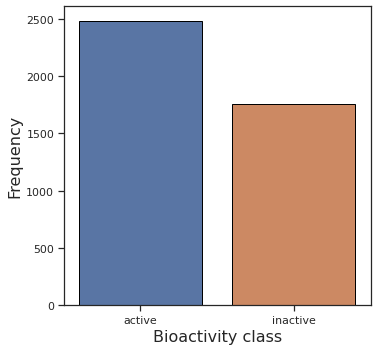

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);


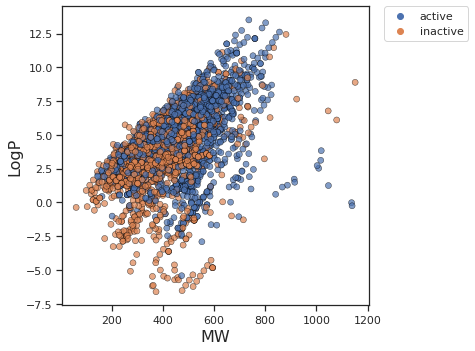

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP',  data=df_2class, hue='class', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=16)
plt.ylabel('LogP', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);


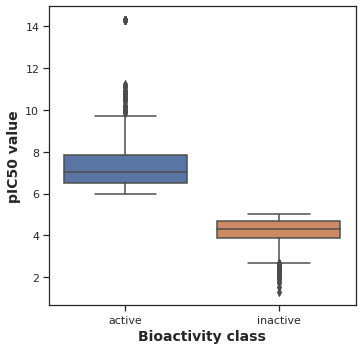

In [23]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold');

In [24]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [25]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4360444.0,0.0,0.05,Different distribution (reject H0)


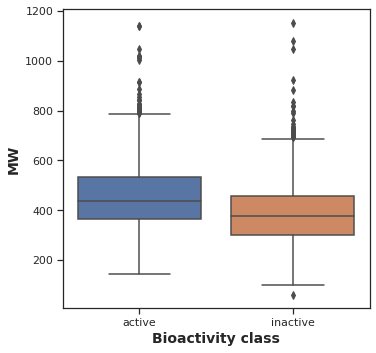

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold');

     

In [27]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2830950.0,1.032237e-61,0.05,Different distribution (reject H0)


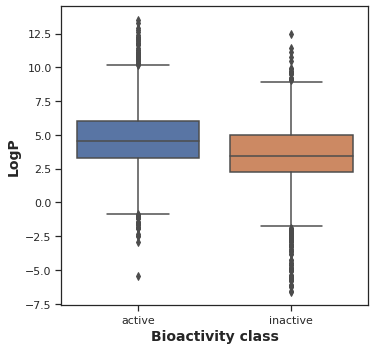

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold');


In [29]:
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2801845.0,1.784792e-56,0.05,Different distribution (reject H0)


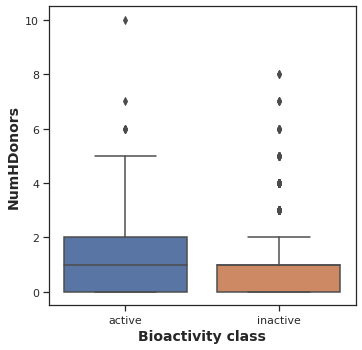

In [30]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold');



In [31]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2497080.0,2.823226e-17,0.05,Different distribution (reject H0)


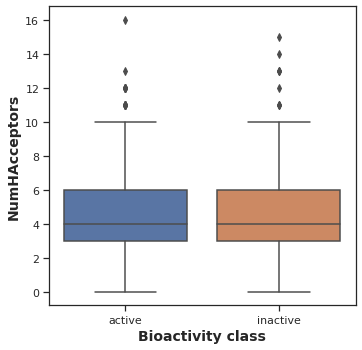

In [32]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold');



In [33]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2314531.0,0.000516,0.05,Different distribution (reject H0)


In this section we will predict the p value for any given cannonical smile 

In [34]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-01 14:13:46--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-01 14:13:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-03-01 14:13:48 (169 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-01 14:13:48--  https://github

In [35]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [36]:

cols = ['canonical_smiles','molecule_chembl_id']
df = df_2class[cols]
df.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [37]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [38]:
! cat molecule.smi | wc -l

4240


In [39]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/4240). 
Processing CHEMBL336398 in molecule.smi (2/4240). 
Processing CHEMBL131588 in molecule.smi (3/4240). Average speed: 14.04 s/mol.
Processing CHEMBL130628 in molecule.smi (4/4240). Average speed: 7.13 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4240). Average speed: 5.30 s/mol.
Processing CHEMBL337486 in molecule.smi (7/4240). Average speed: 3.30 s/mol.
Processing CHEMBL130098 in molecule.smi (6/4240). Average speed: 4.08 s/mol.
Processing CHEMBL336538 in molecule.smi (8/4240). Average speed: 2.81 s/mol.
Processing CHEMBL131051 in molecule.smi (9/4240). Average speed: 2.52 s/mol.
Processing CHEMBL341437 in molecule.smi (10/4240). Average speed: 2.25 s/mol.
Processing CHEMBL335033 in molecule.smi (11/4240). Average speed: 1.92 s/mol.
Processing CHEMBL122983 in molecule.smi (12/4240). Average speed: 1.93 s/mol.
Processing CHEMBL339995 in molecule.smi (14/4240). Average speed: 1.76 s/mol.
Processing CHEMBL338720 in molecule.smi (13/42

In [40]:
X_df = pd.read_csv('descriptors_output.csv')
X_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,CHEMBL5087646,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236,CHEMBL5078914,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4237,CHEMBL5073819,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4238,CHEMBL5092058,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_df.drop(columns="Name", inplace=True)
X_df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Y_df= df_2class.pIC50
Y_df.describe()

count    4240.000000
mean        5.985051
std         1.820032
min         1.304518
25%         4.453457
50%         6.267606
75%         7.233220
max        14.301030
Name: pIC50, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=.8 * (1 - .8)):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]
X= variance_threshold_selector(X_df)
X.head()

,PubchemFP3,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP180,PubchemFP181,...,PubchemFP714,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_df, test_size=.2 , random_state=42 )


In [45]:
y_train

1872     6.744727
4446    10.776764
5325     7.818156
1683     7.050610
4891     6.795880
          ...    
4721     6.075721
624      4.251812
4214     6.050610
5254     6.826814
1157     6.714443
Name: pIC50, Length: 3392, dtype: float64

In [46]:
X_test

,PubchemFP3,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP180,PubchemFP181,...,PubchemFP714,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
1350,1,1,0,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,1,0
1434,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2500,0,1,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1128,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
4144,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4178,0,0,0,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,0,1
4193,1,1,0,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,0,1
2897,0,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0, ignore_warnings = True, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [27:53<00:00, 39.83s/it]


In [49]:
models.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.55,1.22,4.72
LGBMRegressor,0.46,0.55,1.22,0.40
SVR,0.42,0.52,1.26,1.70
NuSVR,0.42,0.51,1.27,1.39
RandomForestRegressor,0.41,0.51,1.27,5.05


In [50]:
predictions.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.55,1.22,4.72
LGBMRegressor,0.46,0.55,1.22,0.40
SVR,0.42,0.52,1.26,1.70
NuSVR,0.42,0.51,1.27,1.39
RandomForestRegressor,0.41,0.51,1.27,5.05


In [51]:
from sklearn.ensemble import HistGradientBoostingRegressor
reg = HistGradientBoostingRegressor(random_state=0)
model=reg.fit(X_train, y_train)
model.score(X_test, y_test)

0.5524188470027469

In [52]:
y_hat= model.predict(X_test)

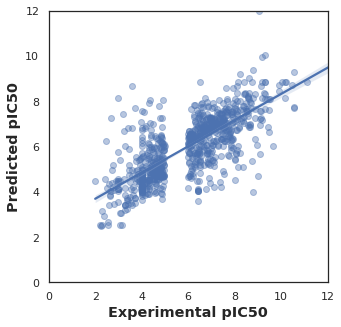

In [53]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_hat , scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show;